<a href="https://colab.research.google.com/github/B4rb4r1s/ML-NN/blob/main/HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

In [2]:
import math
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn import datasets

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Logistic Regression

## SKLearn

In [14]:
# iris = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
iris = datasets.load_iris()

### Iris table

In [15]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

### Code

In [10]:
X = iris.data[:, :2]    # we only take the first two features.
Y = iris.target

In [11]:
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

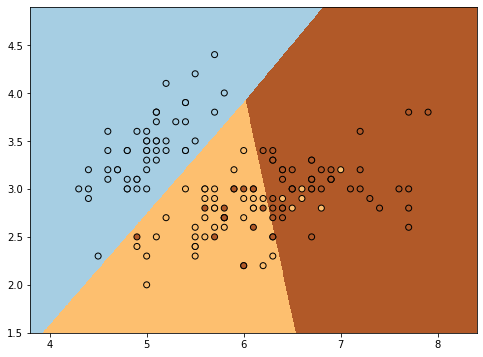

In [19]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
h = .005  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
# plt.xticks(())
# plt.yticks(())

plt.show()

## Manualy

In [ ]:
species = iris['species'].to_numpy().reshape(-1,1)

sepal_length = iris['sepal_length'].to_numpy().reshape(-1,1)
sepal_width = iris['sepal_width'].to_numpy().reshape(-1,1)
petal_length = iris['petal_length'].to_numpy().reshape(-1,1)
petal_width = iris['petal_width'].to_numpy().reshape(-1,1)

In [ ]:
def turnFine(a, b, c, d):
    inputs = np.empty([a.shape[0],4,1])
    for i in range(a.shape[0]):
        frame = np.concatenate((a[i], b[i], c[i], d[i]), axis = 0).reshape(-1,1)
        inputs[i] = frame
    return inputs


class LogisticRegression:
    def __init__(self, lr, gens):
        self.lr = lr
        self.gens = gens
        self.w = np.zeros((1,3))
        self.b = 0.
        self.sum = 0.
        self.mse_ = 0.
    
    def mse(self, y_, y):
        return np.sum((y_ - y)**2) / y.shape[0]
    
    def w_corr(self, y_, y, X):
        return 2 / y.shape[0] * np.sum((y_ - y) * X)
        
    def b_corr(self, y_, y):
        return 2 / y.shape[0] * np.sum(y_ - y)

    def sigmoid(self, x):
        # print(x[0].shape)
        return 1 / ( 1 + math.exp( -x[0] ) )

    def predict(self, X):
        return self.sigmoid(np.dot(self.w, X) + self.b)
        # return np.dot(self.w, X) + self.b

    # For 3 inputs
    def train(self, X, y):

        for i in range(self.gens):
            y_ = self.predict(X[i])
            self.sum += (y[i] - y_)**2
            self.mse_ = self.sum / i

            for k in range(3):
                self.w[0][k] -= self.lr * self.w_corr(y_, y[self.gens], X[self.gens][k])
            self.b -= self.lr * self.b_corr(y_, y[self.gens])

        print("\nIteration: {}/{}".format(i + 1, self.gens))
        print("W: {}, {}, {}\tB: {}".format(self.w[0][0],self.w[0][1],self.w[0][2],self.b))
        print("MSE: {}".format(self.mse_))
        # print("MSE: {}".format(self.mse(y_, y)))

In [ ]:
model = LogisticRegression(0.001, 500)

In [ ]:
model.train(turnFine(sepal_length,sepal_width,petal_length,petal_width), species)

TypeError: ignored